In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb



In [3]:
mnist= tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images/255 

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images/255

# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(train_images[i],cmap='gray')
# plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


 
 

---


  **CNN Model**







In [4]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

2023-03-28 01:25:16.014772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/maven/3.6.3/lib
2023-03-28 01:25:16.014788: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-28 01:25:16.014797: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dover): /proc/driver/nvidia/version does not exist
2023-03-28 01:25:16.014938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=5
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.1552 - accuracy: 0.9522
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0451 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0186 - accuracy: 0.9939


In [6]:
model.evaluate(test_images,test_labels,batch_size=batchSize)

157/157 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9908


[0.029299158602952957, 0.9908000230789185]

Prediction :  7


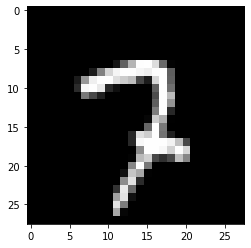

In [7]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(layers.Softmax())

cnt =random.randint(100)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label0)


313/313 [==============================] - 0s 1ms/step


<AxesSubplot:>

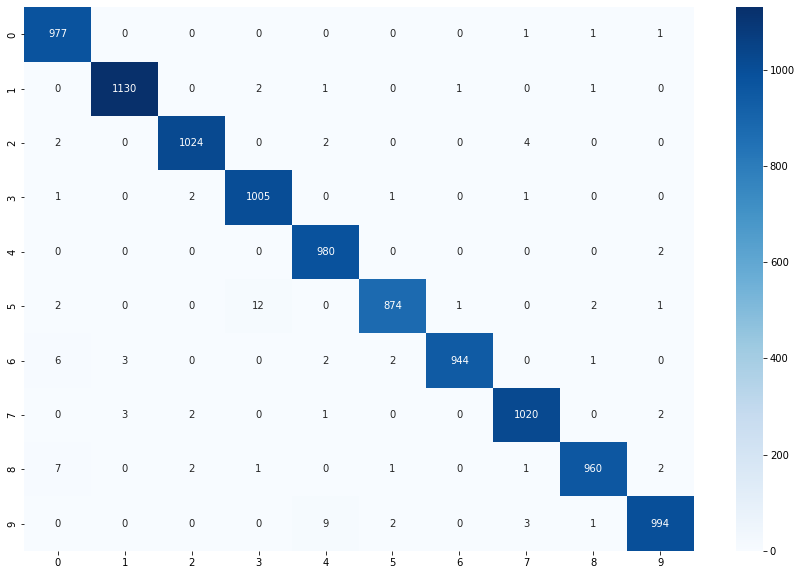

In [10]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")